In [221]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [222]:
pwd

'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification'

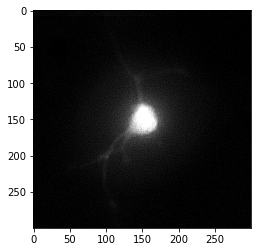

In [389]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\FIJI_SingleTp_S_CTR_1'
img_list = os.listdir(input_path)
current_img_path = os.path.join(input_path, img_list[2])
current_img = cv2.imread(current_img_path)
plt.imshow(current_img)

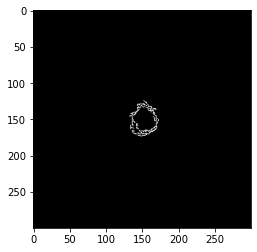

In [390]:
edges = cv2.Canny(current_img, 150, 300)
plt.imshow(edges, cmap='gray')

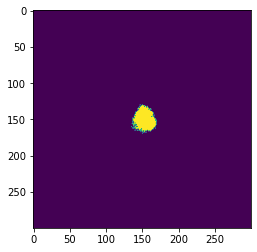

In [391]:
imgray = cv2.cvtColor(current_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 200, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh)

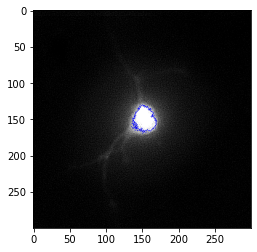

In [393]:
countours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(current_img, countours, -1, (0,0,255), 1))

In [402]:
from imutils import contours
# countours_sorted = contours.sort_contours(countours)[0]
contours_sorted = sorted(countours, key=lambda ctr: cv2.boundingRect(ctr)[1])
# print("sorted Countours are: ", countours)
contour_length = []
for c in countours:
    contour_length.append(len(c))

print("the length of contours are: ", contour_length)
contour_max_idx = contour_length.index(max(contour_length))
print("the index of the max contour is: ", contour_max_idx)
cnt = countours[contour_max_idx]
moment = cv2.moments(cnt)
# print("the moments are: ", moment['m10'])
m_cx = int(moment['m10']/moment['m00'])
m_cy = int(moment['m01']/moment['m00'])

m_centroid = (m_cx, m_cy)
# # (150, 160)
print("centroid is x and y is: ", m_centroid)

the length of contours are:  [1, 1, 1, 2, 1, 1, 1, 108, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1]
the index of the max contour is:  7
centroid is x and y is:  (153, 149)


the ellipse is:  ((152.3915252685547, 150.1234588623047), (31.031761169433594, 35.02986526489258), 177.03884887695312)


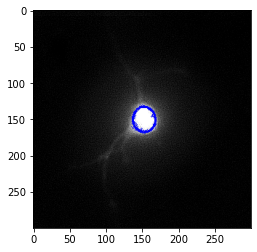

In [403]:
threshold_ellipse = cv2.fitEllipse(cnt)
print("the ellipse is: ", threshold_ellipse)
# ellipse = (centroid, (50, 30), 128)
threshold_ellipse_img = cv2.ellipse(current_img, threshold_ellipse, (0,0,255), 2)
plt.imshow(threshold_ellipse_img)

In [404]:
countours_canny, hierarchy_canny = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt_canny = countours_canny[3]
# plt.imshow(cv2.drawContours(current_img, countours_canny, -1, (0,255,0), 2))
M = cv2.moments(cnt_canny)
# print(cnt_canny)
# print(M)
# print("hierarchy is: ", hierarchy_canny)

In [405]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

centroid = (cx, cy)
# (150, 160)
print("centroid is x and y is: ", centroid)
# print("countours_canny is: ", countours_canny[0])

centroid is x and y is:  (142, 157)


In [406]:
radius = int(25)
# circle_img = cv2.circle(current_img, centroid, radius, (0,255, 255), 2)
# plt.imshow(circle_img)

the ellipse is:  ((142.77581787109375, 157.696044921875), (2.3814151287078857, 3.6833181381225586), 158.2664794921875)


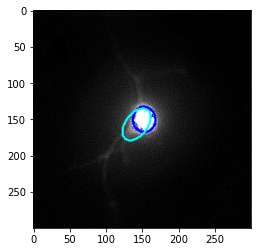

In [407]:
ellipse = cv2.fitEllipse(cnt_canny)
print("the ellipse is: ", ellipse)
ellipse = (centroid, (50, 30), 128)
ellipse_img = cv2.ellipse(current_img, ellipse, (0,255,255), 2)
plt.imshow(ellipse_img)

In [408]:
# Eccentricity calculation: sqrt(1- (minorAxix/majorAxis)^2)
(center, axis, orientatino) = threshold_ellipse

#Length of the major and minor axis
majorAxis = max(axis)
minorAxis = min(axis)

print("the major and minor axis are: ", majorAxis, minorAxis)
eccentricity = np.sqrt(1-(minorAxis/majorAxis)**2)
print("the eccentricity is: ", eccentricity)

the major and minor axis are:  35.02986526489258 31.031761169433594
the eccentricity is:  0.4639414896950389


In [410]:
img_eccentricity_list = []
for img in img_list:
    current_img_path = os.path.join(input_path, img)
    current_img = cv2.imread(current_img_path)
    imgray = cv2.cvtColor(current_img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 150, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_length = []
    for c in contours:
        contour_length.append(len(c))

    print("the length of contours are: ", contour_length)
    contour_max_idx = contour_length.index(max(contour_length))
    print("the index of the max contour is: ", contour_max_idx)
    cnt = contours[contour_max_idx]
#     print("the contours points are: ", contours)
    threshold_ellipse = cv2.fitEllipse(cnt)
    (center, axis, orientation) = threshold_ellipse
    major_axis = max(axis)
    minor_axis = min(axis)
    # print("the major and minor axis are: ", major_axis, minor_axis)
    eccentricity = np.sqrt(1-(minor_axis/major_axis)**2)
    current_img_eccentricity = np.round(eccentricity, 2)
    img_eccentricity_list.append([img, current_img_eccentricity])

print(img_eccentricity_list)

the length of contours are:  [85]
the index of the max contour is:  0
the length of contours are:  [71]
the index of the max contour is:  0
the length of contours are:  [1, 2, 1, 1, 1, 1, 99, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4]
the index of the max contour is:  6
the length of contours are:  [105, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
the index of the max contour is:  0
the length of contours are:  [85, 4, 4, 4, 4, 4, 4]
the index of the max contour is:  0
the length of contours are:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 138, 4, 4, 4, 6, 4, 4, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 6, 4, 1, 1, 1, 33, 4, 6, 4, 4, 6, 6]
the index of the max contour is:  14
the length of contours are:  [1, 2, 1, 1, 1, 149, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 1]
the index of the max contour is:  5
the length of contours are:  [1, 4, 1, 134, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
the index of the max contour is:  3
the length of contours are:  [1, 90, 4, 4, 4]
the index of the max contour is

the index of the max contour is:  1
the length of contours are:  [91, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4]
the index of the max contour is:  0
the length of contours are:  [1, 1, 2, 1, 1, 100, 4, 4, 4, 4, 4, 4, 1, 1, 16]
the index of the max contour is:  5
the length of contours are:  [2, 6, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 20, 4, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 26, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1, 2, 1, 158, 6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 7, 4, 6, 6, 4, 4, 9, 4, 4, 6, 4, 4, 4, 4, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
the index of the max contour is:  119
the length of contours are:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 4,

In [418]:
img_eccentricity_list_class1 = [fn[1] for fn in img_eccentricity_list]
print("the values of the eccentricity of class 1: ", img_eccentricity_list_class1)

the values of the eccentricity of class 1:  [0.56, 0.76, 0.5, 0.49, 0.7, 0.84, 0.91, 0.83, 0.72, 0.88, 0.71, 0.68, 0.78, 0.82, 0.83, 0.75, 0.74, 0.68, 0.63, 0.69, 0.87, 0.74, 0.65, 0.97, 0.72, 0.89, 0.8, 0.88, 0.79, 0.9, 0.72, 0.8, 0.5, 0.78, 0.79, 0.68, 0.81, 0.52, 0.76, 0.55, 0.79, 0.73, 0.73, 0.73, 0.93, 0.89, 0.43, 0.72, 0.66, 0.78, 0.57, 0.64, 0.81, 0.9, 0.64, 0.75, 0.56, 0.48, 0.88, 0.77, 0.89, 0.87, 0.79, 0.82, 0.83, 0.79, 0.9, 0.78, 0.55, 0.43, 0.72, 0.71, 0.89, 0.85, 0.64, 0.45, 0.79, 0.66, 0.99, 0.72, 0.29, 0.68, 0.69, 0.5, 0.46, 0.81, 0.44, 0.45, 0.74, 0.78, 0.37, 0.51, 0.73, 0.78, 0.74, 0.63, 0.7, 0.65, 0.96, 0.61, 0.79, 0.58, 0.45, 0.33, 0.51]


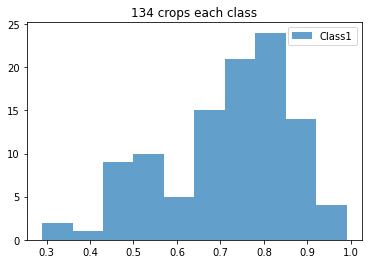

In [419]:
plt.title("134 crops each class")
plt.hist(img_eccentricity_list_class1, bins=10, range=(np.min(img_eccentricity_list_class1),
                                                          np.max(img_eccentricity_list_class1)),
             label='Class1', alpha=0.7)
plt.legend(loc='upper right')
plt.show()